In [6]:
# World happiness report 2015
# importing all required liabraries

import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline



In [9]:
dataset = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")

In [10]:
dataset.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


# countries are ranked on the basis of 6 faxtors
1. Generosity
2. Health (Life Expectancy)
3. Freedom 
4. Economy (GDP per Capita)
5. Dystopia Residual

In [11]:
# checking for missing data

dataset.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [12]:
dataset.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176



to analyse realationship between happiness score with different variable, need to visualization tecniques , first technique i want to use heat map technique

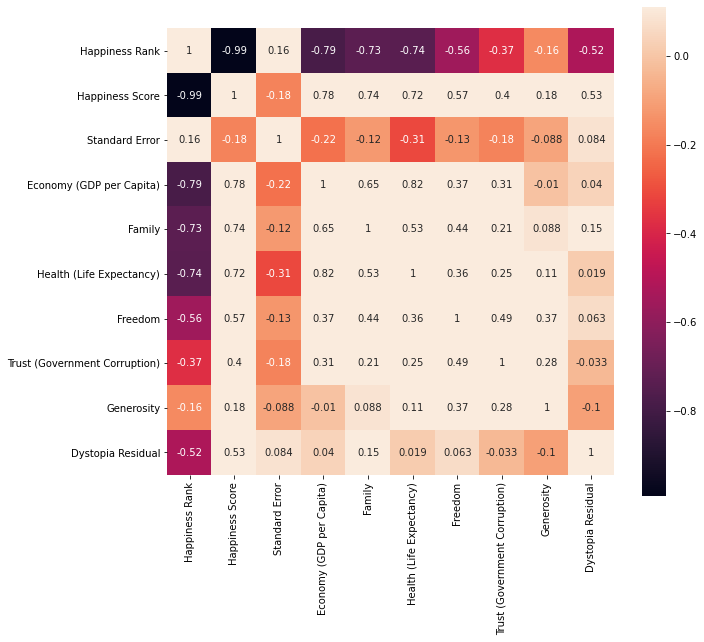

In [15]:
# use corereation matrix
corrmat = dataset.corr()
f,ax= plt.subplots(figsize=(10,9))
sns.heatmap(corrmat, vmax=.11, square=True,annot=True);


by analysing heat map we can observe Health(life expectancy), Economy (GDP per Capita), Family & are strongly co rrelated with happiness score & Freedom,  Dystopia Residual also relates well but upto certain extent.

C:\Users\91988\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

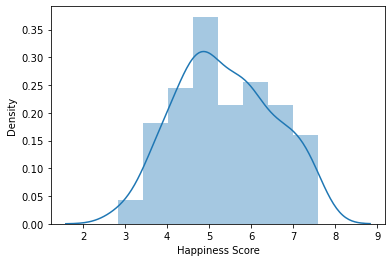

In [19]:
# Analysing the distribution of happiness score data

sns.distplot(dataset['Happiness Score'])

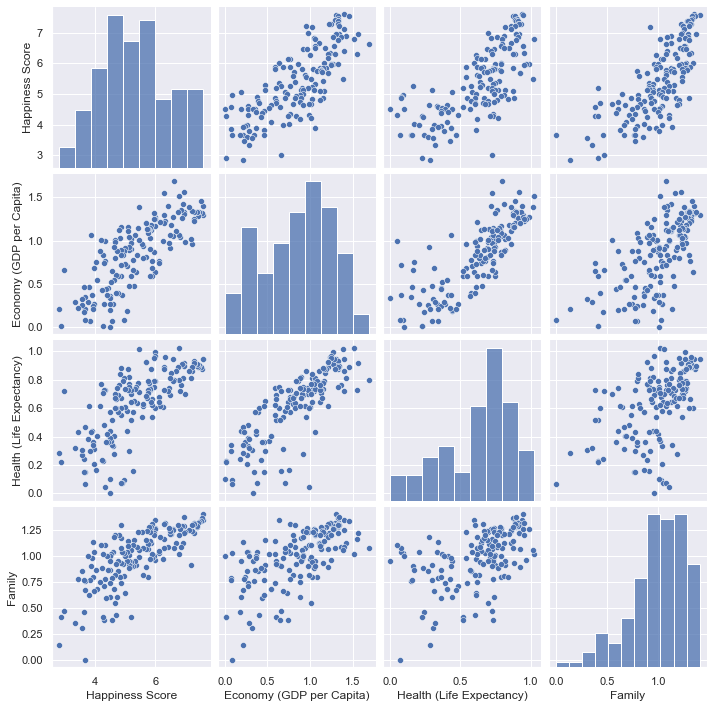

In [30]:
# scatterplots to understand relationship of score with 3 selected predictors
sns.set()
cols=['Happiness Score','Economy (GDP per Capita)','Health (Life Expectancy)','Family']
sns.pairplot(dataset[cols])

here we found all Health(life expectancy), Economy (GDP per Capita), Family are positively corelated with happiness score, increase in these factors will increase in happiness score 

In [33]:
# sorting top 10 countries with highest happiness score
sorted_df = dataset.sort_values(by='Happiness Score', ascending=False).head(10)
sorted_df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


now reshaping exsisting dataframe to observe the impact of each predictor across countries, to get an idea of which factor provides maximum contribution to over all score across countries

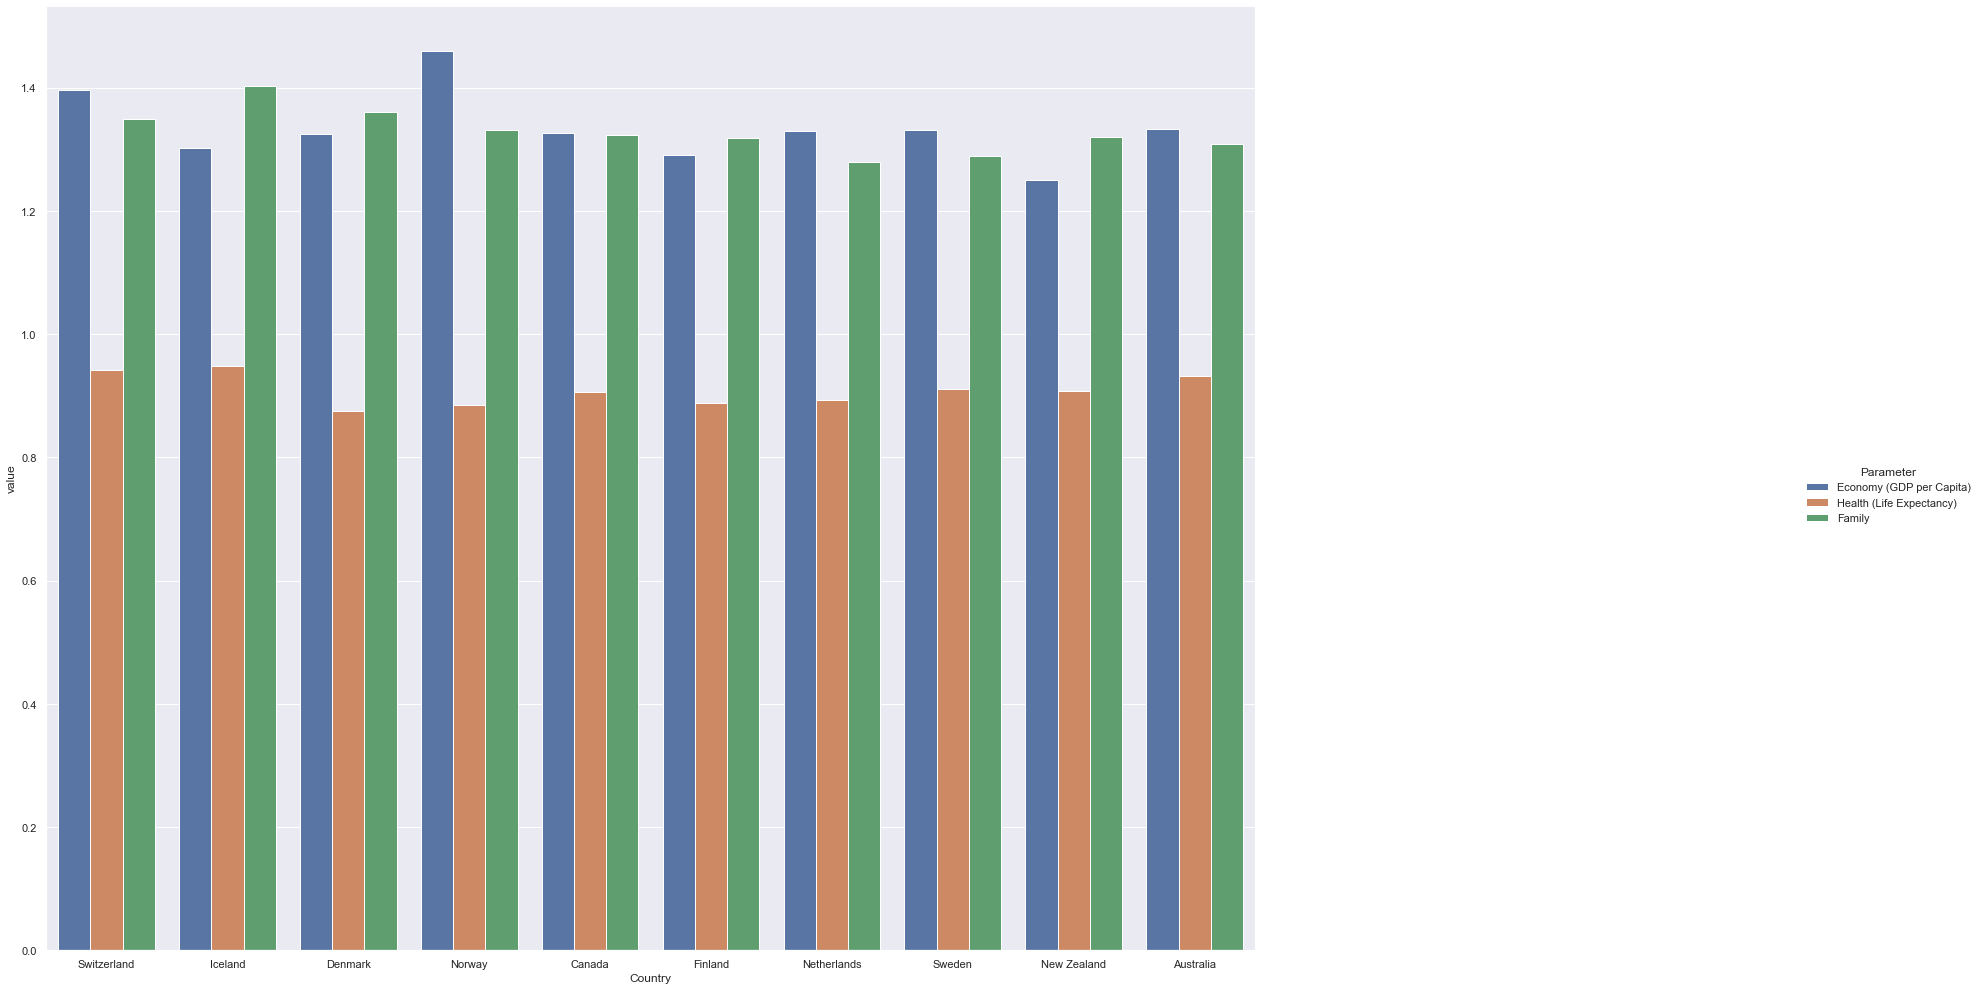

In [41]:
top10=sorted_df[['Country','Economy (GDP per Capita)','Health (Life Expectancy)','Family','Happiness Score']]
top10=top10.melt(id_vars=['Country','Happiness Score'],var_name='Parameter' , ignore_index=False)
z=sns.catplot(x = 'Country' , y = 'value', hue = 'Parameter',data=top10,kind = 'bar')
z.fig.set_figwidth(30)
z.fig.set_figheight(15)


After observing the above plot of Top 10 countries the highest score of Economy (GDP per Capita) is key contributer to Happiness score

<AxesSubplot:>

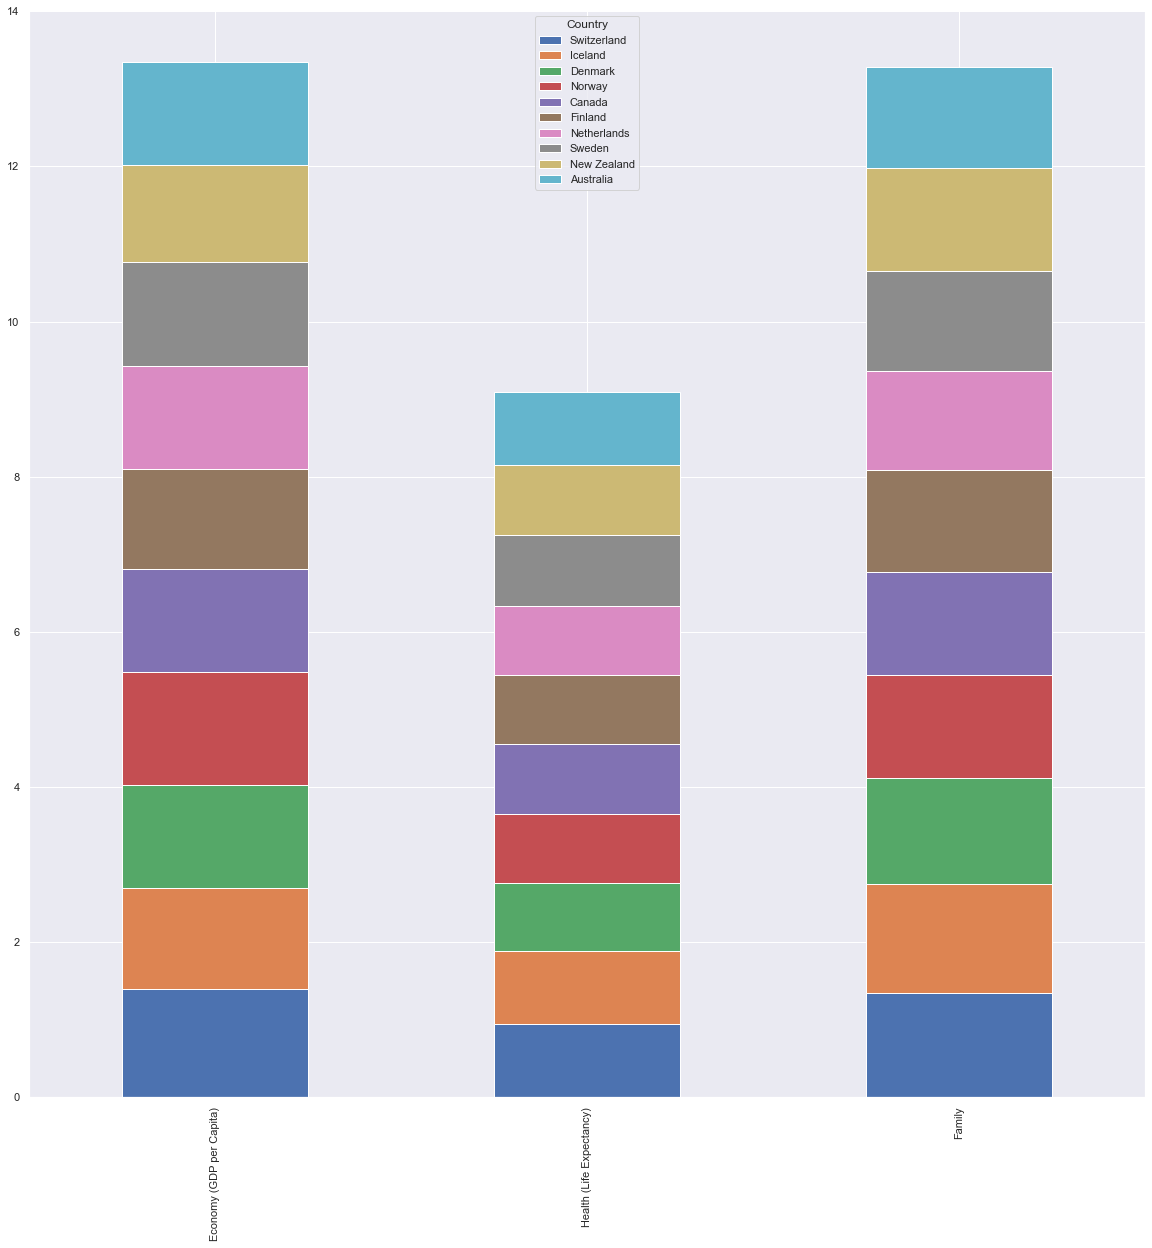

In [42]:
column_list=['Country','Economy (GDP per Capita)','Health (Life Expectancy)','Family']
sorted_df[column_list].set_index('Country').T.plot(kind='bar',stacked=True,figsize=(20,20))